## `About the Dataset`

**Basic Details**
- The Dataset contains 10,000+ records of various Flights of different Airline Companies and important details associated with them.
- It comprises of 11 Attributes - 'Price' is the Dependent Variable (y-variable) while others are Predictor Variables (X-variables).

**Data Dictionary**
- Airline - Name of the Airline Company
- Date of Journey - The Date of the Journey of the concerned flight when the passengers are traveling
- Source - The Source of Station from where it is traveling
- Destination - The final place where the flight lands
- Route - The complete route/way/path of flight
- Dep_Time - The Departure Time
- Arrival_Time - The Arrival Time
- Duration - The total time taken by the flight to reach the destination
- Total_Stops - The number of airport/stations at which the flight would stop before reaching the destination
- Additional_Info - Any other valuable information pertaining to that particular flight
- Price - The Fare of the flight (Dependent Variable)

In [12]:
import statsmodels.api as sn

In [13]:
#from PIL import Image

In [14]:
# myImage = Image.open(r"C:\Users\SM\OneDrive\Desktop\images.jpg");
# myImage

## `Business Problem`

**To Predict the Fare of the Flight Ticket, based on the features so provided, using Machine Learning Algorithms.**

## `Data Import`

In [15]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
os.chdir("C:\Downloads")

In [17]:
os.listdir()

['books',
 'dataset.xlsx',
 'deep learning',
 'hadoop',
 'html  notes',
 'ml',
 'ml files',
 'new data populayion',
 'New folder',
 'New folder (3)',
 'nlp',
 'R',
 'spark',
 'tablue',
 'Telegram Desktop',
 'time series',
 'WALLPAPER']

In [18]:
df= pd.read_excel('dataset.xlsx')

In [19]:
# The first five records of the dataset
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [20]:
# no.of (rows & columns) in our data.
df.shape

(10683, 11)

The data contains 10683_rows & 11_columns.

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [22]:
df.describe

<bound method NDFrame.describe of            Airline Date_of_Journey    Source Destination  \
0           IndiGo      24/03/2019  Banglore   New Delhi   
1        Air India       1/05/2019   Kolkata    Banglore   
2      Jet Airways       9/06/2019     Delhi      Cochin   
3           IndiGo      12/05/2019   Kolkata    Banglore   
4           IndiGo      01/03/2019  Banglore   New Delhi   
...            ...             ...       ...         ...   
10678     Air Asia       9/04/2019   Kolkata    Banglore   
10679    Air India      27/04/2019   Kolkata    Banglore   
10680  Jet Airways      27/04/2019  Banglore       Delhi   
10681      Vistara      01/03/2019  Banglore   New Delhi   
10682    Air India       9/05/2019     Delhi      Cochin   

                       Route Dep_Time  Arrival_Time Duration Total_Stops  \
0                  BLR → DEL    22:20  01:10 22 Mar   2h 50m    non-stop   
1      CCU → IXR → BBI → BLR    05:50         13:15   7h 25m     2 stops   
2      DEL → LKO 

## `Data Pre-processing`

### Importing dataset

    1. After loading the data, it is important to check null values in a column or a row.
    2. If it is present then following can be done:
        a. Filling NaN values with mean, median and mode using fillna() method.
        b. If Less missing values, we can drop it as well.

In [23]:
# checking for total missing_values in our data.

df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [24]:
# So, we can see 'Route' & 'Total_Stops', both have 1 missing_value each.

In [25]:
# As we have very few missing_values, so we can think of deleting all these missing_values.

In [26]:
# getting all the rows where we have missing value.

df[df['Total_Stops'].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


as we have 1 missing value in 'Route' & 'Total_Stops' so we can directly drop this.

In [27]:
# dropping the record having null_value.

df.dropna(inplace= True)

In [28]:
# again checking for null values after dropping.

df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [29]:
# again checking the shape of df after dropping one record.

df.shape

(10682, 11)

## Performing Featurization on "Date_of_Journey"
    ie pre-process it & extract day,month,year from "Date_of_Journey" feature.

In [30]:
# creating copy of df as df1.

df1= df.copy()

In [31]:
df1.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882


In [32]:
df1.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

We can observe that the Date_of_Journey is a object data type here.

Therefore, we have to convert this datatype into timestamp because the model will not be able to understand string values, it just understands Time-stamp.

For this, we require Pandas to_datetime to convert object data_type to datetime dtype.

In [33]:
def change_into_datetime(col):
    df1[col]= pd.to_datetime(df1[col])

In [34]:
df1.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [35]:
# converting [Date_of_Journey, Dep_Time, Arrival_Time] into datetime data_type.

In [36]:
for feature in ['Date_of_Journey','Dep_Time', 'Arrival_Time']:
    change_into_datetime(feature)

C:\Users\Sonu sharma\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '24/03/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\Sonu sharma\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '24/06/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\Sonu sharma\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '27/05/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\Sonu sharma\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '18/04/2019' in DD/MM/YYYY format. 

In [37]:
# checking the datatypes.

df1.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [38]:
# checking the oldest_date.

df1['Date_of_Journey'].min()

Timestamp('2019-01-03 00:00:00')

In [39]:
# checking the latest_date.

df1['Date_of_Journey'].max()

Timestamp('2019-12-06 00:00:00')

In [40]:
# Our date is in format of, YYYY-MM-DD

So, it means our data belongs to 2019 year only, hence extracting year feature & considering this as a input to our ML_model makes no sense.
but if we have more than 1 year, then of-course it may impact.

In [41]:
df1.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2023-02-15 22:20:00,2023-03-22 01:10:00,2h 50m,non-stop,No info,3897
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2023-02-15 05:50:00,2023-02-15 13:15:00,7h 25m,2 stops,No info,7662


### Feature Engineering of "Date_of_Journey" & fetching day, month, year separatly.

In [42]:
# extracting 'day' from Date_of_Journey & storing it.

df1['journey_day']= df1['Date_of_Journey'].dt.day

In [43]:
# extracting 'month' from Date_of_Journey & storing it.

df1['journey_month']= df1['Date_of_Journey'].dt.month

In [44]:
# extracting 'year' from Date_of_Journey & storing it.

df1['journey_year']= df1['Date_of_Journey'].dt.year

In [45]:
df1.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_year
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2023-02-15 22:20:00,2023-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2023-02-15 05:50:00,2023-02-15 13:15:00,7h 25m,2 stops,No info,7662,5,1,2019


In [46]:
# dropping 'Date_of_Journey' after splitting it to 'day, month & year'.

df1.drop('Date_of_Journey', axis=1, inplace=True)                    #-->(axis=1 means column)

In [47]:
# checking after dropping 'Date_of_Journey'.

df1.head(2)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_year
0,IndiGo,Banglore,New Delhi,BLR → DEL,2023-02-15 22:20:00,2023-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2023-02-15 05:50:00,2023-02-15 13:15:00,7h 25m,2 stops,No info,7662,5,1,2019


### Cleaning 'Dep_Time' & 'Arrival_Time' & featurizing it.

In [48]:
# making a function to separate the 'departure_time' & 'arrival_time' into 'hours & minutes'.

In [49]:
def extract_hour_min(df,col):
    df[col+'_hour']= df[col].dt.hour
    df[col+'_minute']= df[col].dt.minute
    df.drop(col, axis=1, inplace=True)
    return df.head(2)

In [50]:
# dropping 'Dep_Time' and adding 'Dep_Time_hour', 'Dep_Time_minute'.

In [51]:
# Departure_time is when a plane leaves the gate.

extract_hour_min(df1,'Dep_Time')

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_year,Dep_Time_hour,Dep_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2023-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2023-02-15 13:15:00,7h 25m,2 stops,No info,7662,5,1,2019,5,50


### Featurizing 'Arrival_Time'

In [52]:
extract_hour_min(df1,'Arrival_Time')

# this function drops 'Arrival_Time' & creates two new columns: Arrival_Time_hour & Arrival_Time_minute.

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15


### analysing when will most of the flights will take-off.

In [53]:
# Converting the flight 'Dep_Time' into proper_time i.e. mid_night, Morning, afternoon & Evening.

def flight_dep_time(x):
    if (x>4) and (x<=8):
        return 'Early_Morning'
    
    elif (x>8) and (x<=12):
        return 'Morning'
    
    elif (x>12) and (x<=16):
        return 'Noon'
    
    elif (x>16) and (x<=20):
        return 'Evening'
    
    elif (x>20) and (x<=24):
        return 'Night'
    else:
        return 'Late_Night'

In [54]:
#

df1['Dep_Time_hour'].apply(flight_dep_time)

0                Night
1        Early_Morning
2              Morning
3              Evening
4                 Noon
             ...      
10678          Evening
10679          Evening
10680    Early_Morning
10681          Morning
10682          Morning
Name: Dep_Time_hour, Length: 10682, dtype: object

In [55]:
# getting the count.

df1['Dep_Time_hour'].apply(flight_dep_time).value_counts()

Early_Morning    2880
Evening          2357
Morning          2209
Noon             1731
Night            1040
Late_Night        465
Name: Dep_Time_hour, dtype: int64

<AxesSubplot:>

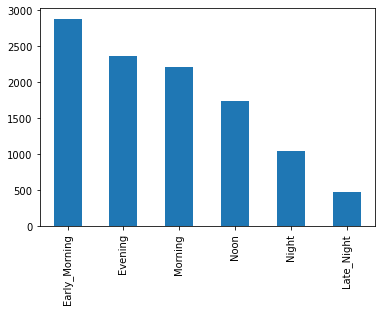

In [56]:
# to visualise.

df1['Dep_Time_hour'].apply(flight_dep_time).value_counts().plot(kind='bar')

Most of the flights will take off during Early Morning hours due to a variety of reasons.

In [57]:
df1.head(5)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,6,9,2019,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,2019,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,2019,16,50,21,35


In [58]:
df1.shape

(10682, 15)

### Pre-processing 'Duration' Feature & extract meaningful features. 

In [59]:
def preprocess_duration(x):
    if 'h' not in x:
        x='0h '+x
    elif 'm' not in x:
        x=x+' 0m'
    return x

In [60]:
# applying the above function on 'Duration' column.

df1['Duration'].apply(preprocess_duration)

0        2h 50m
1        7h 25m
2        19h 0m
3        5h 25m
4        4h 45m
          ...  
10678    2h 30m
10679    2h 35m
10680     3h 0m
10681    2h 40m
10682    8h 20m
Name: Duration, Length: 10682, dtype: object

In [61]:
df1['Duration']= df1['Duration'].apply(preprocess_duration)

In [62]:
df1['Duration']

0        2h 50m
1        7h 25m
2        19h 0m
3        5h 25m
4        4h 45m
          ...  
10678    2h 30m
10679    2h 35m
10680     3h 0m
10681    2h 40m
10682    8h 20m
Name: Duration, Length: 10682, dtype: object

In [63]:
df1['Duration'][0].split(' ')[0]

'2h'

In [64]:
int(df1['Duration'][0].split(' ')[0][0:-1])

2

In [65]:
int(df1['Duration'][0].split(' ')[1][0:-1])

50

In [66]:
df1['Duration_hours']= df1['Duration'].apply(lambda x:int(x.split(' ')[0][0:-1]))

In [67]:
df1['Duration_mins']= df1['Duration'].apply(lambda x:int(x.split(' ')[1][0:-1]))

In [68]:
df1.head(3)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,2019,9,25,4,25,19,0


In [69]:
df1.shape

(10682, 17)

### Analysing whether Duration impacts on Price or not ?

In [70]:
'2*60+50*1'

'2*60+50*1'

In [71]:
### 'eval' is a in-built function of python which evaluates the “String” like a python expression and returns the result as an integer.

eval('2*60+50*1')

170

In [72]:
# adding a column,
# Duration_total_mins= (Duration_hours + Duration_mins)

In [73]:
df1['Duration'].str.replace('h','*60').str.replace(' ','+').str.replace('m','*1').apply(eval)

0         170
1         445
2        1140
3         325
4         285
         ... 
10678     150
10679     155
10680     180
10681     160
10682     500
Name: Duration, Length: 10682, dtype: int64

In [74]:
df1['Duration_total_mins']= df1['Duration'].str.replace('h','*60').str.replace(' ','+').str.replace('m','*1').apply(eval)

In [75]:
df1.head(3)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Duration_total_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50,170
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15,7,25,445
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,2019,9,25,4,25,19,0,1140


In [76]:
df1.shape

(10682, 18)

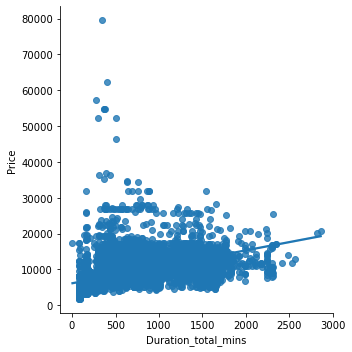

In [77]:
#### It Plot data and regression model fits across a FacetGrid.. (combination of 'regplot` and :class:`FacetGrid)
#### its a extended form of scatter plot..

sns.lmplot(x='Duration_total_mins', y='Price', data= df1)

Conclusion: we can conclude that, as the duration_total_minutes increases Flight_price also increases.

### Which city has maximum final destination of flights ?

In [78]:
# to get all the unique values in Destination.

df1['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [79]:
# to get the count of the destinations.(i.e, how many flights have a destinations of diff. cities.)

df1['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

<AxesSubplot:>

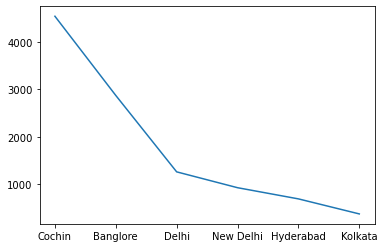

In [80]:
# line-chart.

df1['Destination'].value_counts().plot()

<AxesSubplot:>

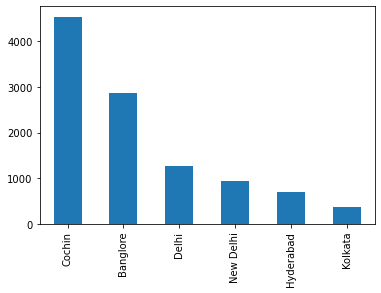

In [81]:
# bar-chart

df1['Destination'].value_counts().plot(kind='bar')

We can see that, most of the flights have Cochin as their destination.

<AxesSubplot:ylabel='Destination'>

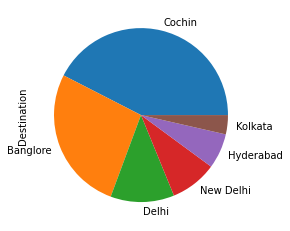

In [82]:
df1['Destination'].value_counts().plot(kind='pie')

Final destination of majority of flights is Cochin. 

### Performing Exploratory Data Analysis(Bi-variate Analysis) to come up with some business insights.
    Problem Statement--> on which route Jet Airways is extremely used?

In [83]:
# 

df1.head(2)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Duration_total_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50,170
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15,7,25,445


In [84]:
df1.shape

(10682, 18)

In [85]:
df1['Route']

0                    BLR → DEL
1        CCU → IXR → BBI → BLR
2        DEL → LKO → BOM → COK
3              CCU → NAG → BLR
4              BLR → NAG → DEL
                 ...          
10678                CCU → BLR
10679                CCU → BLR
10680                BLR → DEL
10681                BLR → DEL
10682    DEL → GOI → BOM → COK
Name: Route, Length: 10682, dtype: object

In [86]:
df1[df1['Airline']== 'Jet Airways'].groupby('Route').size()

Route
BLR → BDQ → DEL            8
BLR → BOM → DEL          385
BLR → BOM → JDH → DEL      3
BLR → DEL                382
BLR → MAA → DEL           10
BOM → BDQ → DEL → HYD      2
BOM → DED → DEL → HYD      1
BOM → DEL → HYD            5
BOM → HYD                207
BOM → IDR → DEL → HYD      1
BOM → JDH → DEL → HYD      1
BOM → UDR → DEL → HYD      1
BOM → VNS → DEL → HYD      1
CCU → BOM → BLR          930
CCU → BOM → PNQ → BLR      4
CCU → DEL → BLR          300
CCU → GAU → BLR           22
DEL → AMD → BOM → COK    141
DEL → ATQ → BOM → COK     38
DEL → BDQ → BOM → COK     28
DEL → BHO → BOM → COK     29
DEL → BOM → COK          875
DEL → CCU → BOM → COK      1
DEL → COK                 34
DEL → DED → BOM → COK      2
DEL → IDR → BOM → COK     86
DEL → IXC → BOM → COK     13
DEL → JAI → BOM → COK    207
DEL → JDH → BOM → COK     23
DEL → LKO → BOM → COK     25
DEL → MAA → BOM → COK     16
DEL → NAG → BOM → COK     61
DEL → UDR → BOM → COK      7
dtype: int64

In [87]:
df1[df1['Airline']== 'Jet Airways'].groupby('Route').size().sort_values(ascending= False)

Route
CCU → BOM → BLR          930
DEL → BOM → COK          875
BLR → BOM → DEL          385
BLR → DEL                382
CCU → DEL → BLR          300
BOM → HYD                207
DEL → JAI → BOM → COK    207
DEL → AMD → BOM → COK    141
DEL → IDR → BOM → COK     86
DEL → NAG → BOM → COK     61
DEL → ATQ → BOM → COK     38
DEL → COK                 34
DEL → BHO → BOM → COK     29
DEL → BDQ → BOM → COK     28
DEL → LKO → BOM → COK     25
DEL → JDH → BOM → COK     23
CCU → GAU → BLR           22
DEL → MAA → BOM → COK     16
DEL → IXC → BOM → COK     13
BLR → MAA → DEL           10
BLR → BDQ → DEL            8
DEL → UDR → BOM → COK      7
BOM → DEL → HYD            5
CCU → BOM → PNQ → BLR      4
BLR → BOM → JDH → DEL      3
DEL → DED → BOM → COK      2
BOM → BDQ → DEL → HYD      2
DEL → CCU → BOM → COK      1
BOM → VNS → DEL → HYD      1
BOM → UDR → DEL → HYD      1
BOM → JDH → DEL → HYD      1
BOM → IDR → DEL → HYD      1
BOM → DED → DEL → HYD      1
dtype: int64

<AxesSubplot:>

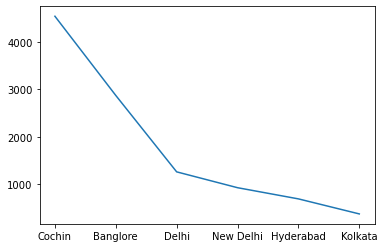

In [88]:
df1['Destination'].value_counts().plot()

<AxesSubplot:xlabel='Route'>

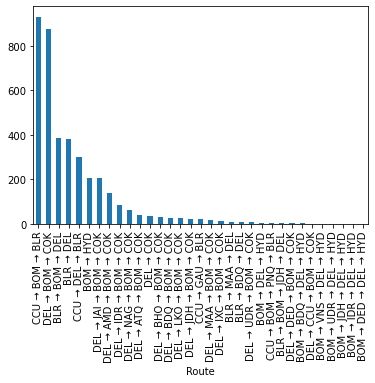

In [89]:
df1[df1['Airline']== 'Jet Airways'].groupby('Route').size().sort_values(ascending= False).plot(kind="bar")

### Airline vs Price Analysis
    i.e, finding price distribution & 5-point summary of each Airline..

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'IndiGo'),
  Text(1, 0, 'Air India'),
  Text(2, 0, 'Jet Airways'),
  Text(3, 0, 'SpiceJet'),
  Text(4, 0, 'Multiple carriers'),
  Text(5, 0, 'GoAir'),
  Text(6, 0, 'Vistara'),
  Text(7, 0, 'Air Asia'),
  Text(8, 0, 'Vistara Premium economy'),
  Text(9, 0, 'Jet Airways Business'),
  Text(10, 0, 'Multiple carriers Premium economy'),
  Text(11, 0, 'Trujet')])

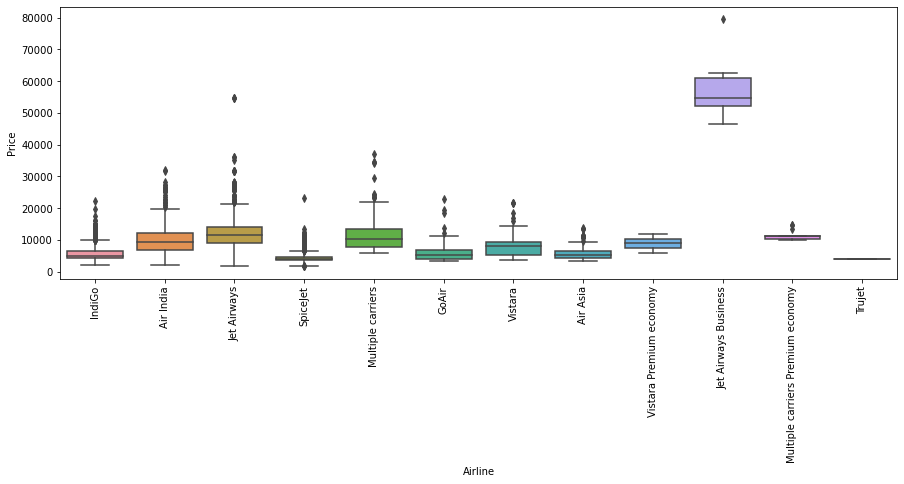

In [90]:
plt.figure(figsize= (15,5))
sns.boxplot(y='Price',x='Airline',data= df1)

plt.xticks(rotation= 'vertical')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'IndiGo'),
  Text(1, 0, 'Air India'),
  Text(2, 0, 'Jet Airways'),
  Text(3, 0, 'SpiceJet'),
  Text(4, 0, 'Multiple carriers'),
  Text(5, 0, 'GoAir'),
  Text(6, 0, 'Vistara'),
  Text(7, 0, 'Air Asia'),
  Text(8, 0, 'Vistara Premium economy'),
  Text(9, 0, 'Jet Airways Business'),
  Text(10, 0, 'Multiple carriers Premium economy'),
  Text(11, 0, 'Trujet')])

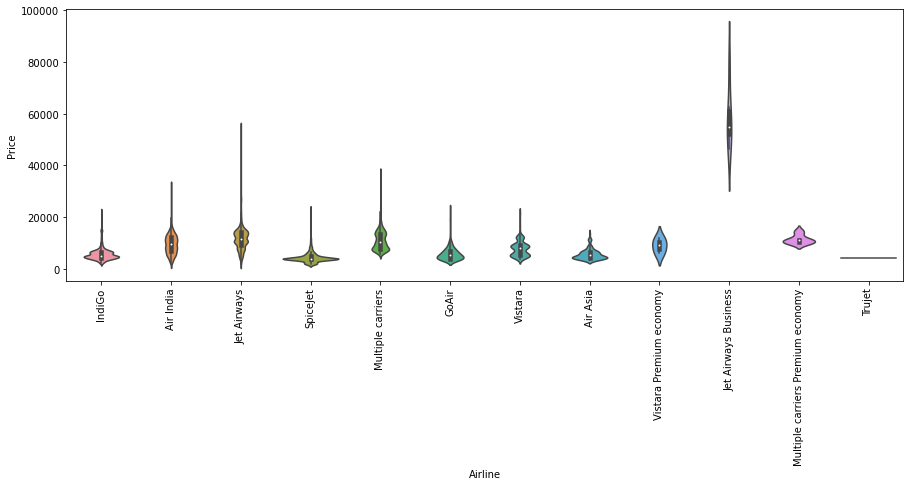

In [91]:
# when we need (boxplot + distribution) both, its good to consider violinplot.

plt.figure(figsize=(15,5))
sns.violinplot(y='Price',x='Airline',data= df1)
plt.xticks(rotation='vertical')

## `Feature-Encoding`
    Applying one-hot encoding

In [92]:
# removing some of the un-necessary features.

In [93]:
df1.head(3)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Duration_total_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50,170
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15,7,25,445
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,2019,9,25,4,25,19,0,1140


In [94]:
# checking the no.of unique values in 'Additional_Info' column.

df1['Additional_Info'].nunique()

10

In [95]:
df1['Additional_Info'].value_counts()

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [96]:
np.round(df1['Additional_Info'].value_counts()/len(df1)*100,2)

No info                         78.11
In-flight meal not included     18.55
No check-in baggage included     3.00
1 Long layover                   0.18
Change airports                  0.07
Business class                   0.04
No Info                          0.03
1 Short layover                  0.01
Red-eye flight                   0.01
2 Long layover                   0.01
Name: Additional_Info, dtype: float64

In [97]:
df1.head(2)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Duration_total_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50,170
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15,7,25,445


In [98]:
# Additional_Info contains almost 80% no_info, so we can drop this column.
# We can drop Route as-well-as we have pre-process that column.
# Total_Stops can represent the Route, so we can drop 'Route'
# lets drop Duration_total_mins as we have already extracted "Duration_hours" & "Duration_mins"
# 'journey_year' can also be dropped as it's same for al the records.


df1.drop(columns= ['Additional_Info', 'Route', 'Duration_total_mins', 'journey_year'], axis=1, inplace=True)

In [99]:
# checking the columns after dropping.

df1.columns

Index(['Airline', 'Source', 'Destination', 'Duration', 'Total_Stops', 'Price',
       'journey_day', 'journey_month', 'Dep_Time_hour', 'Dep_Time_minute',
       'Arrival_Time_hour', 'Arrival_Time_minute', 'Duration_hours',
       'Duration_mins'],
      dtype='object')

In [100]:
df1.head(4)

,Airline,Source,Destination,Duration,Total_Stops,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,7h 25m,2 stops,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,19h 0m,2 stops,13882,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,5h 25m,1 stop,6218,5,12,18,5,23,30,5,25


In [101]:
df1.shape

(10682, 14)

### separating the categorical data & numerical data.

In [102]:
# saving categorical_features in cat_col.

cat_col= [col for col in df1.columns if df1[col].dtype=='object']

In [103]:
# saving numerical_featurs in num_col.
num_col= [col for col in df1.columns if df1[col].dtype!='object']

In [104]:
cat_col

['Airline', 'Source', 'Destination', 'Duration', 'Total_Stops']

### Handling Categorical Data

    We are using 2 basic Encoding Techniques to convert Categorical data into some numerical format
    If data belongs to Nominal data (i.e, data is not in any order) ---> One_Hot_Encoder is used in that case.
    If data belongs to Ordinal data (i.e, data is in order )        ---> Label_Encoder is used in that case.

In [105]:
### applying One-Hot Encoding on 'Source' feature.

In [106]:
### One-Hot from scratch:

In [107]:
df1['Source']

0        Banglore
1         Kolkata
2           Delhi
3         Kolkata
4        Banglore
           ...   
10678     Kolkata
10679     Kolkata
10680    Banglore
10681    Banglore
10682       Delhi
Name: Source, Length: 10682, dtype: object

In [108]:
df1['Source'].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [109]:
df1['Source']

0        Banglore
1         Kolkata
2           Delhi
3         Kolkata
4        Banglore
           ...   
10678     Kolkata
10679     Kolkata
10680    Banglore
10681    Banglore
10682       Delhi
Name: Source, Length: 10682, dtype: object

In [110]:
df1['Source'].apply(lambda x:1 if x=='Banglore' else 0)

0        1
1        0
2        0
3        0
4        1
        ..
10678    0
10679    0
10680    1
10681    1
10682    0
Name: Source, Length: 10682, dtype: int64

In [111]:
for category in df1['Source'].unique():
    df1['Source_'+category]= df1['Source'].apply(lambda x: 1 if x==category else 0)

In [112]:
df1.head(3)

,Airline,Source,Destination,Duration,Total_Stops,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,3897,24,3,22,20,1,10,2,50,1,0,0,0,0
1,Air India,Kolkata,Banglore,7h 25m,2 stops,7662,5,1,5,50,13,15,7,25,0,1,0,0,0
2,Jet Airways,Delhi,Cochin,19h 0m,2 stops,13882,6,9,9,25,4,25,19,0,0,0,1,0,0


#### Performing Target_Guided_Mean_Encoding.
    of course we can use One-hot, but if we have more sub-categories, it creates curse of dimensionality in ML.
    so, using Target_Guided_Mean_Encoding in order to get rid of this.

In [113]:
# average price of each of the Airlines.

df1.groupby(['Airline'])['Price'].mean()

Airline
Air Asia                              5590.260188
Air India                             9612.427756
GoAir                                 5861.056701
IndiGo                                5673.682903
Jet Airways                          11643.923357
Jet Airways Business                 58358.666667
Multiple carriers                    10902.678094
Multiple carriers Premium economy    11418.846154
SpiceJet                              4338.284841
Trujet                                4140.000000
Vistara                               7796.348643
Vistara Premium economy               8962.333333
Name: Price, dtype: float64

In [114]:
# average price of each of the Airlines in ascending_order.

df1.groupby(['Airline'])['Price'].mean().sort_values()

Airline
Trujet                                4140.000000
SpiceJet                              4338.284841
Air Asia                              5590.260188
IndiGo                                5673.682903
GoAir                                 5861.056701
Vistara                               7796.348643
Vistara Premium economy               8962.333333
Air India                             9612.427756
Multiple carriers                    10902.678094
Multiple carriers Premium economy    11418.846154
Jet Airways                          11643.923357
Jet Airways Business                 58358.666667
Name: Price, dtype: float64

In [115]:
# to get only the indexes of the above executed cell.

airlines= df1.groupby(['Airline'])['Price'].mean().sort_values().index

In [116]:
airlines

Index(['Trujet', 'SpiceJet', 'Air Asia', 'IndiGo', 'GoAir', 'Vistara',
       'Vistara Premium economy', 'Air India', 'Multiple carriers',
       'Multiple carriers Premium economy', 'Jet Airways',
       'Jet Airways Business'],
      dtype='object', name='Airline')

In [117]:
# converting the above cell into dictionary.

dict1= {key:index for index,key in enumerate(airlines,0)}

In [118]:
dict1

{'Trujet': 0,
 'SpiceJet': 1,
 'Air Asia': 2,
 'IndiGo': 3,
 'GoAir': 4,
 'Vistara': 5,
 'Vistara Premium economy': 6,
 'Air India': 7,
 'Multiple carriers': 8,
 'Multiple carriers Premium economy': 9,
 'Jet Airways': 10,
 'Jet Airways Business': 11}

In [119]:
df1['Airline']= df1['Airline'].map(dict1)

In [120]:
df1['Airline']

0         3
1         7
2        10
3         3
4         3
         ..
10678     2
10679     7
10680    10
10681     5
10682     7
Name: Airline, Length: 10682, dtype: int64

In [121]:
df1.head(2)

,Airline,Source,Destination,Duration,Total_Stops,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,Banglore,New Delhi,2h 50m,non-stop,3897,24,3,22,20,1,10,2,50,1,0,0,0,0
1,7,Kolkata,Banglore,7h 25m,2 stops,7662,5,1,5,50,13,15,7,25,0,1,0,0,0


In [122]:
# checking the different 'Destination'.

df1['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [123]:
# replacing airport 'New_Delhi to Delhi' as both are same destination.

df1['Destination'].replace('New Delhi', 'Delhi', inplace= True)

In [124]:
# checking the 'Destination' again after replacing 'New_Delhi' to 'Delhi'.

df1['Destination'].unique()

array(['Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Hyderabad'],
      dtype=object)

In [125]:
dest= df1.groupby(['Destination'])['Price'].mean().sort_values().index

In [126]:
dest

Index(['Kolkata', 'Hyderabad', 'Delhi', 'Banglore', 'Cochin'], dtype='object', name='Destination')

In [127]:
# enumerating the destinations from (0 to 4).

dict2= {key:index for index,key in enumerate(dest,0)}

In [128]:
dict2

{'Kolkata': 0, 'Hyderabad': 1, 'Delhi': 2, 'Banglore': 3, 'Cochin': 4}

In [129]:
df1['Destination']= df1['Destination'].map(dict2)

In [130]:
df1['Destination']

0        2
1        3
2        4
3        3
4        2
        ..
10678    3
10679    3
10680    2
10681    2
10682    4
Name: Destination, Length: 10682, dtype: int64

In [131]:
df1.head(2)

,Airline,Source,Destination,Duration,Total_Stops,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,Banglore,2,2h 50m,non-stop,3897,24,3,22,20,1,10,2,50,1,0,0,0,0
1,7,Kolkata,3,7h 25m,2 stops,7662,5,1,5,50,13,15,7,25,0,1,0,0,0


### Perform manual encoding on 'Total_stops' feature.

In [132]:
# checking unique values in Total_Stops.

df1['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [133]:
# enumerating 'Total_Stops' as 0:for non-stop, 1: for 1 stop, and so on...

stops= {'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4}

In [134]:
# replacing 'Total_Stops' as 0:for stop, 1: for 1 stop, and so on..

df1['Total_Stops']= df1['Total_Stops'].map(stops)

In [135]:
# checking 'Total_Stops' column.

df1['Total_Stops']

0        0
1        2
2        2
3        1
4        1
        ..
10678    0
10679    0
10680    0
10681    0
10682    2
Name: Total_Stops, Length: 10682, dtype: int64

In [136]:
# We did feature-encoding on our data.

### Performing Outlier Detection
    Here the list of data visualization plots to spot the outliers.
1. Box and whisker plot (box plot)
2. Scatter plot
3. Histogram
4. Distribution Plot
5. QQ plot

In [137]:
def plot(df,col):
    fig,(ax1,ax2,ax3)= plt.subplots(3,1)
    sns.distplot(df[col], ax=ax1)
    sns.boxplot(df[col],  ax=ax2)
    sns.distplot(df[col], ax=ax3, kde=False)

C:\Users\Sonu sharma\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Sonu sharma\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Sonu sharma\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function fo

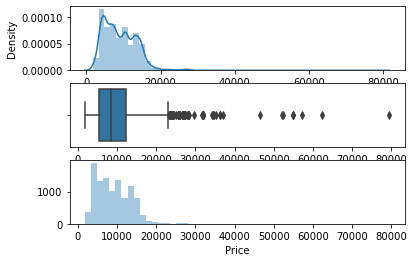

In [138]:
plot(df1,'Price')

In [139]:
df1.head(3)

,Airline,Source,Destination,Duration,Total_Stops,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,Banglore,2,2h 50m,0,3897,24,3,22,20,1,10,2,50,1,0,0,0,0
1,7,Kolkata,3,7h 25m,2,7662,5,1,5,50,13,15,7,25,0,1,0,0,0
2,10,Delhi,4,19h 0m,2,13882,6,9,9,25,4,25,19,0,0,0,1,0,0


In [140]:
# dealing with Outliers.

In [141]:
# replacing 'Price' whether Price>35000, with median_Price.

df1['Price']= np.where(df1['Price']>=35000, df1['Price'].median(), df1['Price'])

C:\Users\Sonu sharma\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Sonu sharma\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Sonu sharma\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function fo

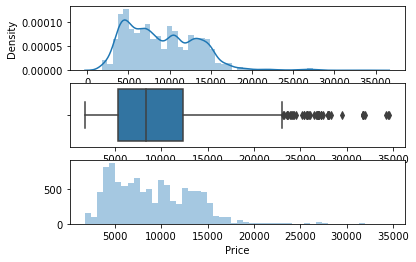

In [142]:
plot(df1,'Price')

In [143]:
# 

In [144]:
df1.head(3)

,Airline,Source,Destination,Duration,Total_Stops,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,Banglore,2,2h 50m,0,3897.0,24,3,22,20,1,10,2,50,1,0,0,0,0
1,7,Kolkata,3,7h 25m,2,7662.0,5,1,5,50,13,15,7,25,0,1,0,0,0
2,10,Delhi,4,19h 0m,2,13882.0,6,9,9,25,4,25,19,0,0,0,1,0,0


In [145]:
# dropping the columns 'Source' & 'Destination'.

df1.drop(columns=['Source','Duration'], axis=1, inplace=True)

In [146]:
df1.head(2)

,Airline,Destination,Total_Stops,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2,0,3897.0,24,3,22,20,1,10,2,50,1,0,0,0,0
1,7,3,2,7662.0,5,1,5,50,13,15,7,25,0,1,0,0,0


In [147]:
# checking the datatypes now.

df1.dtypes

Airline                  int64
Destination              int64
Total_Stops              int64
Price                  float64
journey_day              int64
journey_month            int64
Dep_Time_hour            int64
Dep_Time_minute          int64
Arrival_Time_hour        int64
Arrival_Time_minute      int64
Duration_hours           int64
Duration_mins            int64
Source_Banglore          int64
Source_Kolkata           int64
Source_Delhi             int64
Source_Chennai           int64
Source_Mumbai            int64
dtype: object

In [148]:
# from the above cell, all the features are either integer or, float.

### Performing Feature Selection

In [149]:
df1.head(2)

,Airline,Destination,Total_Stops,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2,0,3897.0,24,3,22,20,1,10,2,50,1,0,0,0,0
1,7,3,2,7662.0,5,1,5,50,13,15,7,25,0,1,0,0,0


In [150]:
from sklearn.feature_selection import mutual_info_regression

In [151]:
# 'Price' is 'dependent_feature' & the rest all are 'independent_features'.

X= df1.drop(['Price'], axis=1)

In [152]:
y= df1['Price']

In [153]:
# cross-checking the datatypes.

X.dtypes

Airline                int64
Destination            int64
Total_Stops            int64
journey_day            int64
journey_month          int64
Dep_Time_hour          int64
Dep_Time_minute        int64
Arrival_Time_hour      int64
Arrival_Time_minute    int64
Duration_hours         int64
Duration_mins          int64
Source_Banglore        int64
Source_Kolkata         int64
Source_Delhi           int64
Source_Chennai         int64
Source_Mumbai          int64
dtype: object

In [154]:
mutual_info_regression(X,y)

array([0.97310872, 0.99873607, 0.79056375, 0.20340822, 0.23471482,
       0.34003356, 0.25437805, 0.39942173, 0.3519405 , 0.46926388,
       0.3431468 , 0.3871665 , 0.46045628, 0.52058731, 0.13412752,
       0.20138374])

In [155]:
# storing all in a DataFrame.
imp= pd.DataFrame(mutual_info_regression(X,y), index=X.columns)
imp

,0
Airline,0.988711
Destination,1.004653
Total_Stops,0.784859
journey_day,0.196481
journey_month,0.240846
Dep_Time_hour,0.341613
Dep_Time_minute,0.262453
Arrival_Time_hour,0.394817
Arrival_Time_minute,0.350567
Duration_hours,0.464385


In [156]:
# 'mutual_info_regression' estimates the mutual_information for continuous_target_variable.

# 'Mutual_Information' between two random_variables or, between two_features is a non-negative_value which measures the-
#-dependency between that two variables.
# If the value=0; i.e, the two_variables are 'independent'.
# & as the value increses i.e, they have high_dependency.


In [157]:
# storing all in a DataFrame.

imp= pd.DataFrame(mutual_info_regression(X,y), index=X.columns)
imp

,0
Airline,0.967421
Destination,1.001762
Total_Stops,0.792812
journey_day,0.191934
journey_month,0.242274
Dep_Time_hour,0.332915
Dep_Time_minute,0.271543
Arrival_Time_hour,0.399624
Arrival_Time_minute,0.351086
Duration_hours,0.470676


In [158]:
# storing all in a DataFrame.

imp= pd.DataFrame(mutual_info_regression(X,y), index=X.columns)
imp.columns=['importance']

In [159]:
imp.sort_values(by='importance', ascending=False)

,importance
Destination,1.001105
Airline,0.986036
Total_Stops,0.787498
Source_Delhi,0.531482
Duration_hours,0.473665
Source_Kolkata,0.464090
Arrival_Time_hour,0.397008
Source_Banglore,0.385941
Arrival_Time_minute,0.357516
Duration_mins,0.339139


### Building the ML_Model

#### splitting dataset into 'train & test'

In [160]:
from sklearn.model_selection import train_test_split

In [161]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.25, random_state=42)

#### what we often do in modelling:
    a. Initially, lets build basic random_forest_model.
    b. then later-on, we will try to improve this model using some parameters.
    c. Then, we will hyper-tune my model to get optimal value of parameters in order to achieve optimal value of params.

In [162]:
from sklearn.ensemble import RandomForestRegressor

In [163]:
ml_model= RandomForestRegressor()

In [164]:
model= ml_model.fit(X_train,y_train)

In [165]:
y_pred= model.predict(X_test)

In [166]:
y_pred

array([16727.51,  6322.61,  8791.07, ...,  3478.63,  6201.52,  6989.24])

In [167]:
# shape of the 
y_pred.shape

(2671,)

In [168]:
len(X_test)

2671

### How to save ML model into disk

lets try to dump ml model using pickle & joblib.
Advantage of dumping-
imagine in future we have new data ,& lets say we have to predict price on this huge data

then just for this new data , we have to execute all the above cells follow the entire pipeline, then only we are able to predict on this.
So to get rid of such issue, will just dump it to reuse it again & again.
What does this file store?
this save coefficients of our model.. not an entire dataset

In [169]:
!pip install pickle

ERROR: Could not find a version that satisfies the requirement pickle (from versions: none)
ERROR: No matching distribution found for pickle


In [170]:
import pickle

In [171]:
file= open(r'','wb')

# wb: write in binary_mode.

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\ishant\\Desktop\\IMARTICUS Lerning\\PROJECT_IMAR/rf_random.pkl'

In [ ]:
pickle.dump(model,file)

In [ ]:
model= open(r'C:\Users\ishant\Desktop\IMARTICUS Lerning\PROJECT_IMAR/rf_random.pkl','rb')

# rb: read in binary_mode.

In [ ]:
forest= pickle.load(model)

In [ ]:
# predictions w.r.t. X_test.

forest.predict(X_test)

### defining your own evaluation metric :

In [ ]:
def mape(y_true, y_pred):
    y_true,y_pred= np.array(y_true),np.array(y_pred)
    
    return np.mean(np.abs((y_true - y_pred)/y_true))*100

In [ ]:
mape(y_test,forest.predict(X_test))

### How to automate ML_pipeline:

In [ ]:
def predict(ml_model):
    model= ml_model.fit(X_train,y_train)
    print('Training_score: {}'.format(model.score(X_train,y_train)))
    y_prediction= model.predict(X_test)
    print('Predictions are: {}'.format(y_prediction))
    
    from sklearn import metrics
    r2_score= metrics.r2_score(y_test,y_prediction)
    print('r2_score: {}'.format(r2_score))
    print('MSE: ', metrics.mean_squared_error(y_test,y_prediction))
    print('MAE: ', metrics.mean_absolute_error(y_test,y_prediction))
    print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test,y_prediction)))
    print('MAPE: ', mape(y_test,y_prediction))
    sns.distplot(y_test-y_prediction)

In [ ]:
predict(RandomForestRegressor())

In [ ]:
# from the above we can see that, 
# We can see that at 0 we have most of the instances where our machine_learning_model is predicting good.

In [ ]:
### How to hypertune ML_model.
#     Hyperparameter_Tuning or, Hyperparameter Optimization
#     1. Choose following method for hyperparameter tuning
#         a. RandomizedSearchCV --> Fast way to Hypertune model
#         b. GridSearchCV       --> Slow way to hypertune my model
#     2. Choose ML_Algo that we have to hypertune.
#     3. Assign hyperparameters in form of dictionary or create hyper-parameter space
#     4. Define searching & apply searching on Training_data or Fit the CV model 
#     5. Check best parameters and best_score

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
### initialising estimator.

reg_rf= RandomForestRegressor()

In [ ]:
np.linspace(start=1000, stop=1200, num=6)

In [ ]:
# No.of trees in random forest
n_estimators= [int(x) for x in np.linspace(start=1000,stop=1200,num=6)]

# No.of features to consider at every split
max_features= ["auto", "sqrt"]

# Maximum number of levels in tree
max_depth= [int(x) for x in np.linspace(start=5,stop=30,num=4)]

# Minimum number of samples required to split a node
min_samples_split= [5,10,15,100]

In [ ]:
# Create the grid or hyper-parameter space.

random_grid={
    'n_estimators': n_estimators,          # no.of trees to build the random_forest.
    'max_features': max_features,          # no.of features to consider at every split.
    'max_depth': max_depth,                # the max no.of levels in the tree.
    'min_samples_split': min_samples_split # min no.of samples required to split a node.
    }

In [ ]:
random_grid

In [ ]:
rf_Random= RandomizedSearchCV(reg_rf, param_distributions=random_grid, cv=3, verbose=2, n_jobs=-1)

In [ ]:
# fitting in the training_data.

rf_Random.fit(X_train,y_train)

In [ ]:
# to get the best parameters for RF_model.

rf_Random.best_params_

In [ ]:
# making predictions using the above model.

pred2= rf_Random.predict(X_test)

In [ ]:
# to evaluate how well our model performs.

from sklearn import metrics
metrics.r2_score(y_test, pred2)

In [ ]:
# So, we are obtaining an accuracy approximately close to 82% because of the tuning of the parameters.